In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('./ml2-train.csv', encoding = 'ISO-8859-1', low_memory = False)
train.info()
result = train.state.fillna(train.state.describe().top)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [3]:
data = pd.read_csv('ml2-data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [5]:
df = data.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13652 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     13652 non-null  int64  
 1   full_sq                                13652 non-null  int64  
 2   life_sq                                13652 non-null  float64
 3   floor                                  13652 non-null  float64
 4   sub_area                               13652 non-null  object 
 5   preschool_quota                        13652 non-null  float64
 6   preschool_education_centers_raion      13652 non-null  int64  
 7   school_quota                           13652 non-null  float64
 8   school_education_centers_raion         13652 non-null  int64  
 9   school_education_centers_top_20_raion  13652 non-null  int64  
 10  hospital_beds_raion                    13652 non-null  float64
 11  he

In [6]:
df.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [8]:
test_data = np.array(train.balance_due)
test_data

array([305.,  75.,   0., ...,   0.,   0.,   0.])

In [9]:
c = np.reshape(test_data, (len(test_data),1))

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler_std = StandardScaler()
a = scaler.fit_transform(c)
b = scaler_std.fit_transform(c)
b.min()

-13.147334652567258

In [11]:
a = train[train.balance_due > 0].balance_due.apply(lambda x: x**(1/2))

In [12]:
a.mean()

17.011653135633672

In [13]:
a.median() - a.mean()

0.4525960609393067

In [14]:
df = pd.read_csv('ml2-data_flats.csv',sep=";")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [16]:
df.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Fili Davydkovo', 'Otradnoe',
       'Novo-Peredelkino', 'Bogorodskoe', 'Jaroslavskoe', 'Strogino',
       'Hovrino', "Moskvorech'e-Saburovo", 'Staroe Krjukovo', 'Ljublino',
       'Caricyno', 'Veshnjaki', 'Danilovskoe', 'Preobrazhenskoe',
       "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino',
       'Donskoe', 'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino',
       'Izmajlovo', 'Severnoe Medvedkovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Babushkinskoe', 'Pokrovskoe Streshnevo', 'Obruc

In [17]:
df.groupby(by='sub_area').median().price_doc.sort_values()

sub_area
Poselenie Klenovskoe          1000000.0
Molzhaninovskoe               1200000.0
Poselenie Novofedorovskoe     2795473.0
Poselenie Shhapovskoe         2925500.0
Poselenie Filimonkovskoe      3153072.0
                                ...    
Obruchevskoe                 12500000.0
Zamoskvorech'e               12750000.0
Lomonosovskoe                13500000.0
Kurkino                      13930000.0
Hamovniki                    15625000.0
Name: price_doc, Length: 146, dtype: float64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [19]:
a = train[['balance_due', 'discount_amount']]
a.head()

,balance_due,discount_amount
0,305.0,0.0
1,75.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [20]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(train[['balance_due', 'discount_amount']])
poly_features
poly_features.shape

(250306, 10)

In [21]:
poly_features

array([[  1., 305.,   0., ...,   0.,   0.,   0.],
       [  1.,  75.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [22]:
an_array = np.mean(poly_features, axis=0)
np.argmax(an_array, axis=0)

6

In [23]:
train.payment_date

0                         NaN
1         2005-06-02 00:00:00
2                         NaN
3                         NaN
4                         NaN
                 ...         
250301                    NaN
250302                    NaN
250303                    NaN
250304                    NaN
250305                    NaN
Name: payment_date, Length: 250306, dtype: object

In [24]:
datetime_vals = pd.to_datetime(train.ticket_issued_date.dropna())
len(datetime_vals[datetime_vals.dt.weekday > 4])

1620

In [25]:
ecology_dict = {
    'good': 3, 'excellent' :4, 'poor': 1, 'satisfactory': 2, 'no data': 0
}
df.ecology = df.ecology.replace(to_replace = ecology_dict)

In [34]:
df.ecology.mean()

1.7282483836030063

In [36]:
train.balance_due.describe()

count    250306.000000
mean        222.449058
std         606.394010
min       -7750.000000
25%           0.000000
50%          25.000000
75%         305.000000
max       11030.000000
Name: balance_due, dtype: float64

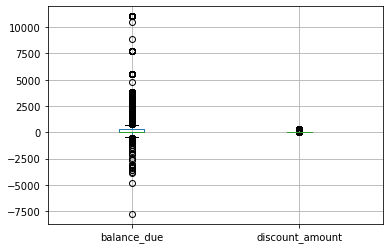

In [61]:
a.boxplot()

In [62]:
a.balance_due.max() - a.balance_due.min()

18780.0

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [60]:
c = DBSCAN(a.balance_due)
c

DBSCAN(eps=0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64)

In [55]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

o = outliers_iqr(train.balance_due.dropna())
vis_data2 = pd.concat([pd.DataFrame(o), train], axis=1)
np.abs(vis_data2.balance_due.min() - vis_data2.balance_due.max())

18780.0